# EBLR

In [1]:
from lineartree import LinearBoostClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
from joblib import dump
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [2]:
import sys
sys.path.append('F:\\Users\\Manuel García Plaza\\Desktop\\TFG\\')

In [3]:
from notebooks.utils.classification_metrics import classification

In [4]:
train =  pd.read_parquet('../../../data/model_input/train_sets/breast_cancer.parquet')
validation =  pd.read_parquet('../../../data/model_input/validation_sets/breast_cancer.parquet')

y_train = train.diagnosis
X_train = train.drop(columns=['diagnosis'])

y_validation = validation.diagnosis
X_validation = validation.drop(columns=['diagnosis'])

In [5]:
scaler = StandardScaler().fit(X_train, y_train)

X_train_scaled = scaler.transform(X_train)
X_validation_scaled = scaler.transform(X_validation)

In [35]:
max_depth = [1, 2, 3]
n_est = [1, 2, 3, 4, 5]
base_est =  [LogisticRegression(penalty=None), LogisticRegression(), LogisticRegression(penalty='l1', solver='liblinear')]

In [36]:
names_list = []
for n in n_est:
    for depth in max_depth:
        for est in base_est:
            if est.penalty == None:
                name = f'EBLR_{depth}_{n}'
            elif est.penalty == 'l2':
                name = f'EBLR_{depth}_{n}_l2'
            elif est.penalty == 'l1':
                name = f'EBLR_{depth}_{n}_l1'
            elif est.penalty == 'elasticnet':
                name = f'EBLR_{depth}_{n}_en_{est.l1_ratio}'
            else:
                raise ValueError('Unknown base estimator type')

            names_list.append(name)

In [37]:
models_list = []
for n in n_est:
    for i in max_depth:
        for est in base_est:
            models_list.append(LinearBoostClassifier(base_estimator=est, n_estimators=n, max_depth=i))

In [38]:
metrics = classification(models_list, names_list, '../../../data/metrics/breast_cancer/eblr.csv', X_train_scaled, y_train, X_validation_scaled, y_validation, metrics={})
metrics

,Run_Time,Train_AUC,Validation_AUC,delta%
EBLR_1_1,0.032538,1.000000,0.993734,-0.626566
EBLR_1_1_l2,0.023096,0.999117,0.995614,-0.350652
EBLR_1_1_l1,0.010240,0.999171,0.977444,-2.174536
EBLR_2_1,0.023221,1.000000,0.993734,-0.626566
EBLR_2_1_l2,0.022828,0.999117,0.994987,-0.413364
EBLR_2_1_l1,0.012250,0.999171,0.976817,-2.237245
EBLR_3_1,0.022601,1.000000,0.993734,-0.626566
EBLR_3_1_l2,0.024218,0.999117,0.994361,-0.476076
EBLR_3_1_l1,0.013140,0.999171,0.977444,-2.174536
EBLR_1_2,0.027283,1.000000,0.994361,-0.563910


In [39]:
metrics.sort_values(by='Validation_AUC', ascending=False)

,Run_Time,Train_AUC,Validation_AUC,delta%
EBLR_3_5_l2,0.078290,0.999492,0.998120,-0.137227
EBLR_1_3,0.042034,1.000000,0.996867,-0.313283
EBLR_2_3,0.037324,1.000000,0.996867,-0.313283
EBLR_3_5,0.058801,1.000000,0.996867,-0.313283
EBLR_3_3,0.048456,1.000000,0.996867,-0.313283
EBLR_2_5,0.058792,1.000000,0.996867,-0.313283
EBLR_1_5,0.065375,1.000000,0.996867,-0.313283
EBLR_1_3_l2,0.042234,0.999037,0.996241,-0.279932
EBLR_3_4_l2,0.067006,0.999545,0.996241,-0.330626
EBLR_1_4,0.042353,1.000000,0.996241,-0.375940


We choose **EBLR_3_5_l2** as the best model.

In [40]:
test =  pd.read_parquet('../../../data/model_input/test_sets/breast_cancer.parquet')

In [41]:
y_test = test.diagnosis
X_test = test.drop(columns=['diagnosis'])

In [42]:
retrain = pd.concat([train, validation])

y_retrain = retrain.diagnosis
X_retrain = retrain.drop(columns=['diagnosis'])

In [43]:
scaler_retrain = StandardScaler().fit(X_retrain)

X_retrain_scaled = scaler_retrain.transform(X_retrain)
X_test_scaled = scaler_retrain.transform(X_test)

In [47]:
model = LinearBoostClassifier(base_estimator=LogisticRegression(), max_depth=3, n_estimators=5).fit(X_retrain_scaled, y_retrain)

In [48]:
test_pred = model.predict_proba(X_test_scaled)[:, 1]
auc = roc_auc_score(y_test, test_pred)
print('Test AUC:', round(auc, 4))

Test AUC: 0.9896


In [49]:
dump(model, 'best_eblr.joblib')

['best_eblr.joblib']

In [50]:
with open('../../../data/metrics/breast_cancer/final_AUC.txt', 'a') as f:
    f.write('\nEBLR, '+ str(auc))

In [51]:
print(f'Initial number of features: {X_retrain.shape[1]}\nFinal number of features: {model.transform(X_retrain_scaled).shape[1]}')

Initial number of features: 30
Final number of features: 35


In [52]:
error_trees = model._trees

#### New Feature 1

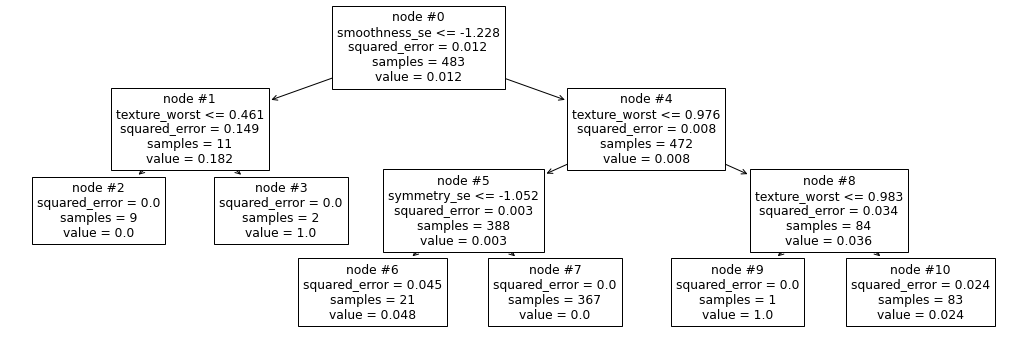

In [53]:
plt.figure(figsize=(18, 6))
plot_tree(error_trees[0], node_ids=True, feature_names=X_retrain.columns);

In [54]:
pred = np.abs(error_trees[0].predict(X_retrain_scaled))
worst_leaf = np.argmax(pred)
error_path = error_trees[0].decision_path(X_retrain_scaled[[worst_leaf]]).toarray()
indexes = np.where(error_path == 1)[1]

path1 = []
for i in indexes[:-1]:
    path1.append(str(X_retrain.columns[error_trees[0].tree_.feature[i]])+' <= '+str(error_trees[0].tree_.threshold[i]))
path1.append('leaf value: '+str(model._leaves[0]))

path1

['smoothness_se <= -1.228117823600769',
 'texture_worst <= 0.46141450852155685',
 'leaf value: 1.0']

This new variable is $1$ when that path is $True, False$, $0$ otherwise

In [55]:
pred_tree = np.abs(error_trees[0].predict(X_retrain_scaled.astype(np.float32), check_input=False))
pred_tree = (pred_tree == model._leaves[0]).astype(np.float32)
pred_tree = pred_tree.reshape(-1, 1)
X_trans = np.concatenate([X_retrain_scaled, pred_tree], axis=1)

#### New Feature 2

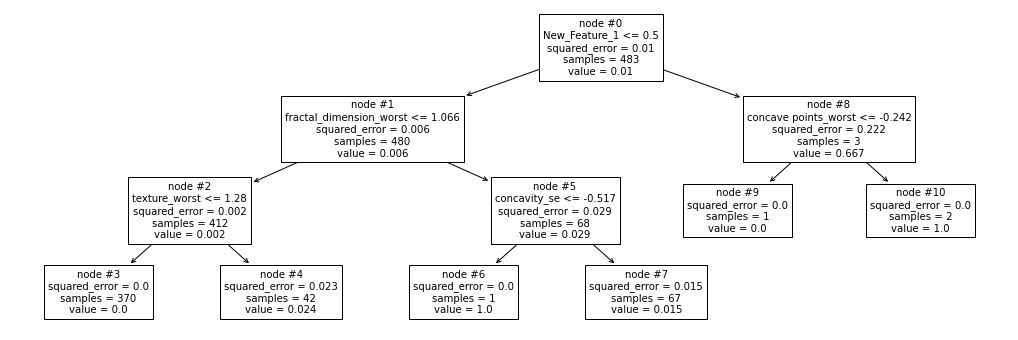

In [56]:
plt.figure(figsize=(18, 6))
plot_tree(error_trees[1], node_ids=True, feature_names=list(X_retrain.columns)+['New_Feature_1']);

In [57]:
pred = np.abs(error_trees[1].predict(X_trans))
worst_leaf = np.argmax(pred)
error_path = error_trees[1].decision_path(X_trans[[worst_leaf]]).toarray()
indexes = np.where(error_path == 1)[1]

path2 = []
for i in indexes[:-1]:
    path2.append(str(list(list(X_retrain.columns)+['New_Feature_1'])[error_trees[1].tree_.feature[i]])+' <= '+str(error_trees[1].tree_.threshold[i]))
path2.append('leaf value: '+str(model._leaves[1]))

path2

['New_Feature_1 <= 0.5',
 'concave points_worst <= -0.2419396359473467',
 'leaf value: 1.0']

If a sample makes $False, False$ along this path, it will result in a $1$ in this new feature

In [58]:
pred_tree = np.abs(error_trees[1].predict(X_trans.astype(np.float32), check_input=False))
pred_tree = (pred_tree == model._leaves[1]).astype(np.float32)
pred_tree = pred_tree.reshape(-1, 1)
X_trans = np.concatenate([X_trans, pred_tree], axis=1)

#### New Feature 3

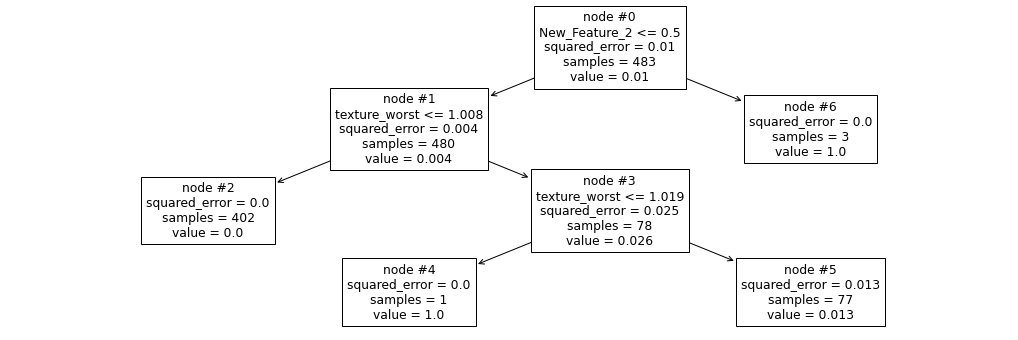

In [60]:
plt.figure(figsize=(18, 6))
plot_tree(error_trees[2], node_ids=True, feature_names=list(X_retrain.columns)+['New_Feature_1']+['New_Feature_2']);

In [62]:
pred = np.abs(error_trees[2].predict(X_trans))
worst_leaf = np.argmax(pred)
error_path = error_trees[2].decision_path(X_trans[[worst_leaf]]).toarray()
indexes = np.where(error_path == 1)[1]

path3 = []
for i in indexes[:-1]:
    path3.append(str(list(list(X_retrain.columns)+['New_Feature_1']+['New_Feature_2'])[error_trees[2].tree_.feature[i]])+' <= '+str(error_trees[2].tree_.threshold[i]))
path3.append('leaf value: '+str(model._leaves[2]))

path3

['New_Feature_2 <= 0.5', 'leaf value: 1.0']

This feature is a copy of the previous one

In [63]:
pred_tree = np.abs(error_trees[2].predict(X_trans.astype(np.float32), check_input=False))
pred_tree = (pred_tree == model._leaves[2]).astype(np.float32)
pred_tree = pred_tree.reshape(-1, 1)
X_trans = np.concatenate([X_trans, pred_tree], axis=1)

#### New Feature 4

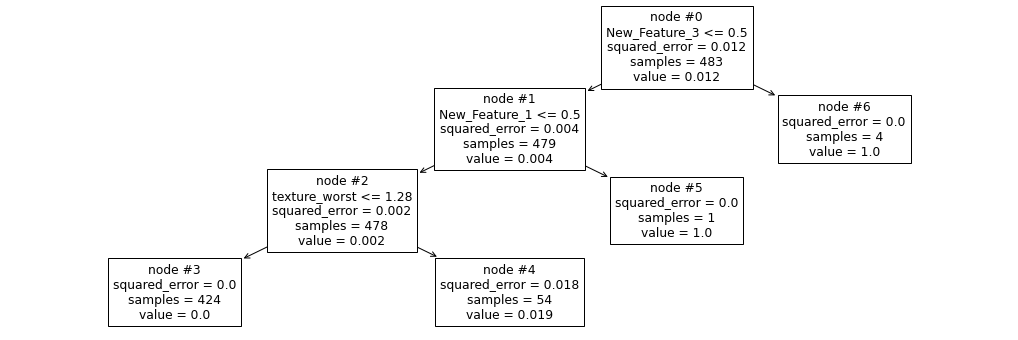

In [65]:
plt.figure(figsize=(18, 6))
plot_tree(error_trees[3], node_ids=True, feature_names=list(X_retrain.columns)+['New_Feature_1']+['New_Feature_2']+['New_Feature_3']);

In [67]:
pred = np.abs(error_trees[3].predict(X_trans))
worst_leaf = np.argmax(pred)
error_path = error_trees[3].decision_path(X_trans[[worst_leaf]]).toarray()
indexes = np.where(error_path == 1)[1]

path4 = []
for i in indexes[:-1]:
    path4.append(str(list(list(X_retrain.columns)+['New_Feature_1']+['New_Feature_2']+['New_Feature_3'])[error_trees[3].tree_.feature[i]])+' <= '+str(error_trees[3].tree_.threshold[i]))
path4.append('leaf value: '+str(model._leaves[3]))

path4

['New_Feature_3 <= 0.5', 'New_Feature_1 <= 0.5', 'leaf value: 1.0']

This feature makes a 1 when the new feature 3 is 0 and new feature 1 is 1

In [68]:
pred_tree = np.abs(error_trees[3].predict(X_trans.astype(np.float32), check_input=False))
pred_tree = (pred_tree == model._leaves[3]).astype(np.float32)
pred_tree = pred_tree.reshape(-1, 1)
X_trans = np.concatenate([X_trans, pred_tree], axis=1)

#### New Feature 5

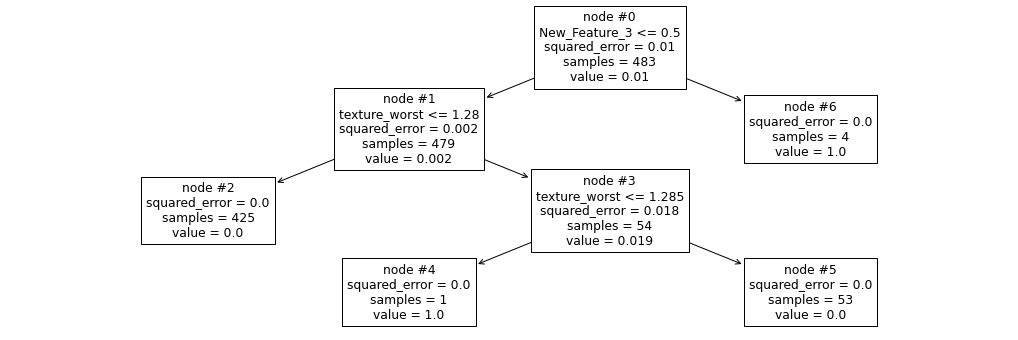

In [69]:
plt.figure(figsize=(18, 6))
plot_tree(error_trees[4], node_ids=True, feature_names=list(X_retrain.columns)+['New_Feature_1']+['New_Feature_2']+['New_Feature_3']+['New_Feature_4']);

In [70]:
pred = np.abs(error_trees[4].predict(X_trans))
worst_leaf = np.argmax(pred)
error_path = error_trees[4].decision_path(X_trans[[worst_leaf]]).toarray()
indexes = np.where(error_path == 1)[1]

path5 = []
for i in indexes[:-1]:
    path5.append(str(list(list(X_retrain.columns)+['New_Feature_1']+['New_Feature_2']+['New_Feature_3']+['New_Feature_4'])[error_trees[4].tree_.feature[i]])+' <= '+str(error_trees[4].tree_.threshold[i]))
path5.append('leaf value: '+str(model._leaves[4]))

path5

['New_Feature_3 <= 0.5',
 'texture_worst <= 1.2797333598136902',
 'texture_worst <= 1.2846978306770325',
 'leaf value: 1.0']

We need a result of $True, False, True$ in this path for making a 1 in this new variable

In [71]:
top_threshold = 0
top_coefficients = [coef for coef in model.base_estimator_.coef_.ravel() if abs(coef) > top_threshold]
top_features = [name for name, coef in zip(X_retrain.columns, model.base_estimator_.coef_.ravel()) if abs(coef) > top_threshold]
labels = [' ' if feature not in top_features else feature for feature in X_retrain.columns]+['New_Feature_1']+['New_Feature_2']+['New_Feature_3']+['New_Feature_4']+['New_Feature_5']

C:\Users\MANUEL~2\AppData\Local\Temp/ipykernel_9892/37561750.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=50, ha='right')


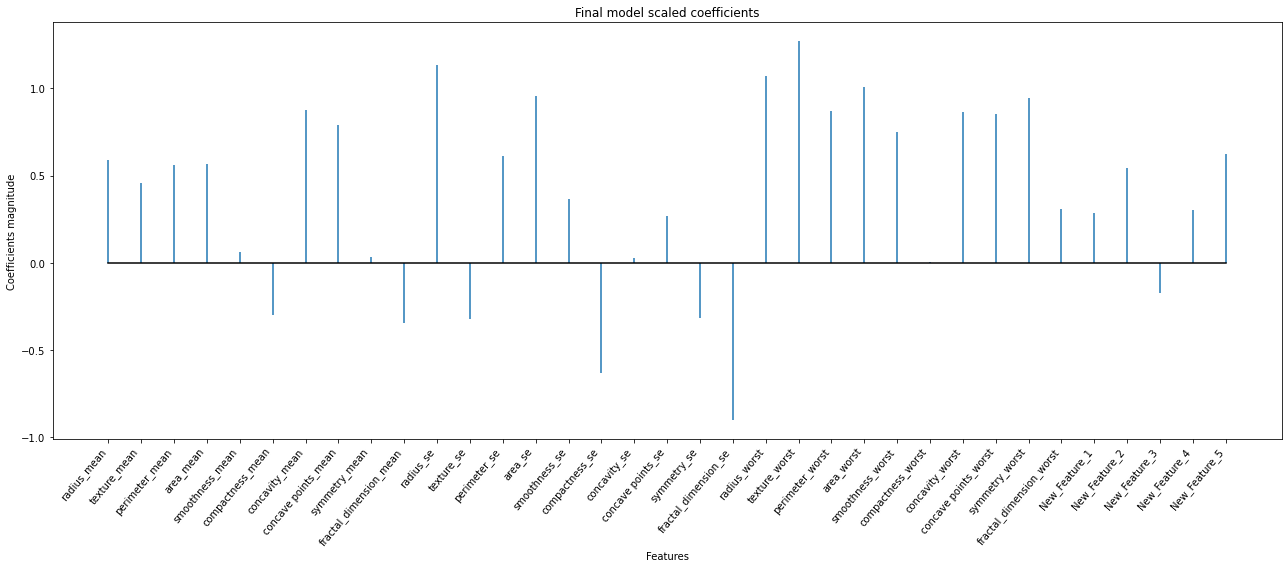

In [75]:
fig, ax = plt.subplots(figsize=(18, 8))
ax.stem(list(list(X_retrain.columns)+['New_Feature_1']+['New_Feature_2']+['New_Feature_3']+['New_Feature_4']+['New_Feature_5']), model.base_estimator_.coef_.ravel(), markerfmt=' ', basefmt='k-')
ax.set_xlabel('Features')
ax.set_ylabel('Coefficients magnitude')
ax.set_title('Final model scaled coefficients')
ax.set_xticklabels(labels, rotation=50, ha='right')
plt.tight_layout()
plt.show()